# Analisis Data E-Commerce

In [1]:
from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import library yang dibutuhkan
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('ggplot')
from datetime import datetime

## Membuat koneksi

In [3]:
# membuat koneksi ke database olist.db
con = sqlite3.connect("/olist.db")

# create cursor
curs = con.cursor()

# execute query
table = curs.execute("SELECT name FROM sqlite_master WHERE type = 'table'")

# show all tables
table.fetchall()

[('olist_order_customer_dataset',),
 ('olist_order_dataset',),
 ('olist_order_reviews_dataset',),
 ('olist_order_payments_dataset',),
 ('olist_order_items_dataset',),
 ('olist_products_dataset',),
 ('olist_sellers_dataset',),
 ('olist_geolocation_dataset',),
 ('product_category_name_translation',)]

## Impor dataset

### Melakukan impor semua table menjadi dataframe

In [4]:
# Tabel customer
customer_df = pd.read_sql_query(
    """
    SELECT *
    FROM olist_order_customer_dataset;
    """, con)

# Tabel order
order_df = pd.read_sql_query(
    """
    SELECT *
    FROM olist_order_dataset;
    """, con)

# Tabel review
review_df = pd.read_sql_query(
    """
    SELECT *
    FROM olist_order_reviews_dataset;
    """, con)

# Tabel payments
payments_df = pd.read_sql_query(
    """
    SELECT *
    FROM olist_order_payments_dataset;
    """, con)

# Tabel items
items_df = pd.read_sql_query(
    """
    SELECT *
    FROM olist_order_items_dataset;
    """, con)

# Tabel product
product_df = pd.read_sql_query(
    """
    SELECT *
    FROM olist_products_dataset;
    """, con)

# Tabel sellers
sellers_df = pd.read_sql_query(
    """
    SELECT *
    FROM olist_sellers_dataset;
    """, con)

# Tabel geolocation
geoloc_df = pd.read_sql_query(
    """
    SELECT *
    FROM olist_geolocation_dataset;
    """, con)

# Tabel product category
prodcat_df = pd.read_sql_query(
    """
    SELECT *
    FROM product_category_name_translation;
    """, con)

## Olist at a glance

### Menampilkan 5 data teratas dan statistika deskriptif semua dataframe

In [5]:
# Tabel customer
customer_df.head()


,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customer_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,99441.0,NaN,NaN,NaN,49720.0,28706.288396,0.0,24860.0,49720.0,74580.0,99440.0
customer_id,99441,99441,06b8999e2fba1a1fbc88172c00ba8bc7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_unique_id,99441,96096,8d50f5eadf50201ccdcedfb9e2ac8455,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_zip_code_prefix,99441.0,NaN,NaN,NaN,35137.474583,29797.938996,1003.0,11347.0,24416.0,58900.0,99990.0
customer_city,99441,4119,sao paulo,15540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_state,99441,27,SP,41746,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Table order
order_df.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
order_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,99441.0,NaN,NaN,NaN,49720.0,28706.288396,0.0,24860.0,49720.0,74580.0,99440.0
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_status,99441,8,delivered,96478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_approved_at,99281,90733,2018-02-27 04:31:10,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Table review
review_df.head()

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
review_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,99224.0,NaN,NaN,NaN,49611.5,28643.645892,0.0,24805.75,49611.5,74417.25,99223.0
review_id,99224,98410,7b606b0d57b078384f0b58eac1d41d78,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,99224,98673,c88b1d1b157a9999ce368f218a407141,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_score,99224.0,NaN,NaN,NaN,4.086421,1.347579,1.0,4.0,5.0,5.0,5.0
review_comment_title,11568,4527,Recomendo,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_comment_message,40977,36159,Muito bom,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_creation_date,99224,636,2017-12-19 00:00:00,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_answer_timestamp,99224,98248,2017-06-15 23:21:05,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Table payments
payments_df.head()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
payments_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,103886.0,NaN,NaN,NaN,51942.5,29989.44937,0.0,25971.25,51942.5,77913.75,103885.0
order_id,103886,99440,fa65dad1b0e818e3ccc5cb0e39231352,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_sequential,103886.0,NaN,NaN,NaN,1.092679,0.706584,1.0,1.0,1.0,1.0,29.0
payment_type,103886,5,credit_card,76795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_installments,103886.0,NaN,NaN,NaN,2.853349,2.687051,0.0,1.0,1.0,4.0,24.0
payment_value,103886.0,NaN,NaN,NaN,154.10038,217.494064,0.0,56.79,100.0,171.8375,13664.08


In [13]:
# Table items
items_df.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
items_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,112650.0,NaN,NaN,NaN,56324.5,32519.398249,0.0,28162.25,56324.5,84486.75,112649.0
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_item_id,112650.0,NaN,NaN,NaN,1.197834,0.705124,1.0,1.0,1.0,1.0,21.0
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shipping_limit_date,112650,93318,2017-07-21 18:25:23,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,112650.0,NaN,NaN,NaN,120.653739,183.633928,0.85,39.9,74.99,134.9,6735.0
freight_value,112650.0,NaN,NaN,NaN,19.99032,15.806405,0.0,13.08,16.26,21.15,409.68


In [15]:
# Tabel product
product_df.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [16]:
product_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,32951.0,NaN,NaN,NaN,16475.0,9512.278697,0.0,8237.5,16475.0,24712.5,32950.0
product_id,32951,32951,1e9e8ef04dbcff4541ed26657ea517e5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_name,32341,73,cama_mesa_banho,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name_lenght,32341.0,NaN,NaN,NaN,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,NaN,NaN,NaN,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,NaN,NaN,NaN,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,NaN,NaN,NaN,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,NaN,NaN,NaN,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,NaN,NaN,NaN,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,NaN,NaN,NaN,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


In [17]:
# Tabel sellers
sellers_df.head()

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [18]:
sellers_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,3095.0,NaN,NaN,NaN,1547.0,893.593867,0.0,773.5,1547.0,2320.5,3094.0
seller_id,3095,3095,3442f8959a84dea7ee197c632cb2df15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_zip_code_prefix,3095.0,NaN,NaN,NaN,32291.059451,32713.45383,1001.0,7093.5,14940.0,64552.5,99730.0
seller_city,3095,611,sao paulo,694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_state,3095,23,SP,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Tabel geolocation
geoloc_df.head()

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP


In [20]:
geoloc_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,1000163.0,NaN,NaN,NaN,500081.0,288722.332979,0.0,250040.5,500081.0,750121.5,1000162.0
geolocation_zip_code_prefix,1000163.0,NaN,NaN,NaN,36574.166466,30549.33571,1001.0,11075.0,26530.0,63504.0,99990.0
geolocation_lat,1000163.0,NaN,NaN,NaN,-21.176153,5.715866,-36.605374,-23.603546,-22.919377,-19.97962,45.065933
geolocation_lng,1000163.0,NaN,NaN,NaN,-46.390541,4.269748,-101.466766,-48.573172,-46.637879,-43.767709,121.105394
geolocation_city,1000163,8011,sao paulo,135800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geolocation_state,1000163,27,SP,404268,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Tabel product category
prodcat_df.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [22]:
prodcat_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,71.0,NaN,NaN,NaN,35.0,20.639767,0.0,17.5,35.0,52.5,70.0
product_category_name,71,71,beleza_saude,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_name_english,71,71,health_beauty,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Memeriksa dan memberikan *treatment* pada missing values

In [23]:
# Persentase missing value table customers
customer_df.isnull().sum().sort_values(ascending=False)/len(customer_df)*100

index                       0.0
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

In [24]:
# Persentase missing value table order
order_df.isnull().sum().sort_values(ascending=False)/len(order_df)*100

order_delivered_customer_date    2.981668
order_delivered_carrier_date     1.793023
order_approved_at                0.160899
index                            0.000000
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
dtype: float64

In [25]:
# Mengkecualikan missing value table order dari proses analisis lanjutan
order_df = order_df.dropna()

In [26]:
# Table order sudah tidak memiliki missing value
order_df.isnull().sum().sort_values(ascending=False)/len(order_df)*100

index                            0.0
order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
dtype: float64

In [27]:
# Persentase missing value table review
review_df.isnull().sum().sort_values(ascending=False)/len(review_df)*100

review_comment_title       88.341530
review_comment_message     58.702532
index                       0.000000
review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

Pada platform E-Commerce, kolom `review_comment_title` dan `review_comment_message` tidak mandatory diisi. Sehingga diberikan *treatment* dengan diisi nilai `unknown`

In [28]:
# mengganti nilai nan dengan unknown
review_df["review_comment_title"] = review_df["review_comment_title"].fillna("unknown")
review_df["review_comment_message"] = review_df["review_comment_message"].fillna("unknown")

In [29]:
review_df.isnull().sum().sort_values(ascending=False)/len(review_df)*100

index                      0.0
review_id                  0.0
order_id                   0.0
review_score               0.0
review_comment_title       0.0
review_comment_message     0.0
review_creation_date       0.0
review_answer_timestamp    0.0
dtype: float64

In [30]:
# Persentase missing value table payments
payments_df.isnull().sum().sort_values(ascending=False)/len(payments_df)*100

index                   0.0
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

In [31]:
# Persentase missing value table items
items_df.isnull().sum().sort_values(ascending=False)/len(items_df)*100

index                  0.0
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [32]:
# Persentase missing value table product
product_df.isnull().sum().sort_values(ascending=False)/len(product_df)*100

product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
index                         0.000000
product_id                    0.000000
dtype: float64

In [33]:
# Mengkecualikan missing value table product dari proses analisis lanjutan
product_df = product_df.dropna()

In [34]:
# Table product sudah tidak memiliki missing value
product_df.isnull().sum().sort_values(ascending=False)/len(product_df)*100

index                         0.0
product_id                    0.0
product_category_name         0.0
product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_length_cm             0.0
product_height_cm             0.0
product_width_cm              0.0
dtype: float64

In [35]:
# Persentase missing value table sellers
sellers_df.isnull().sum().sort_values(ascending=False)/len(sellers_df)*100

index                     0.0
seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

In [36]:
# Persentase missing value table geolocation
geoloc_df.isnull().sum().sort_values(ascending=False)/len(sellers_df)*100

index                          0.0
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

In [37]:
# Persentase missing value table product category
prodcat_df.isnull().sum().sort_values(ascending=False)/len(sellers_df)*100

index                            0.0
product_category_name            0.0
product_category_name_english    0.0
dtype: float64

### Memeriksa duplikasi data

In [38]:
# Memeriksa duplikasi data pada table customers
duplicate_rows = customer_df[customer_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [index, customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []


In [39]:
# Memeriksa duplikasi data pada table order
duplicate_rows = order_df[order_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [index, order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []


In [40]:
# Memeriksa duplikasi data pada table review
duplicate_rows = review_df[review_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [index, review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp]
Index: []


In [41]:
# Memeriksa duplikasi data pada table payments
duplicate_rows = payments_df[payments_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [index, order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []


In [42]:
# Memeriksa duplikasi data pada table items
duplicate_rows = items_df[items_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [index, order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []


In [43]:
# Memeriksa duplikasi data pada table product
duplicate_rows = product_df[product_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [index, product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []


In [44]:
# Memeriksa duplikasi data pada table sellers
duplicate_rows = sellers_df[sellers_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [index, seller_id, seller_zip_code_prefix, seller_city, seller_state]
Index: []


In [45]:
# Memeriksa duplikasi data pada table geolocation
duplicate_rows = geoloc_df[geoloc_df.duplicated()]
print(duplicate_rows)
# geoloc_df.to_csv("geoloc.csv")

Empty DataFrame
Columns: [index, geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state]
Index: []


In [46]:
# Memeriksa duplikasi data pada table product category
duplicate_rows = prodcat_df[prodcat_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [index, product_category_name, product_category_name_english]
Index: []


### Memeriksa tipe data

In [47]:
# Memeriksa tipe data pada table customer
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     99441 non-null  int64 
 1   customer_id               99441 non-null  object
 2   customer_unique_id        99441 non-null  object
 3   customer_zip_code_prefix  99441 non-null  int64 
 4   customer_city             99441 non-null  object
 5   customer_state            99441 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


In [48]:
# Memeriksa tipe data pada table order
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          96461 non-null  int64 
 1   order_id                       96461 non-null  object
 2   customer_id                    96461 non-null  object
 3   order_status                   96461 non-null  object
 4   order_purchase_timestamp       96461 non-null  object
 5   order_approved_at              96461 non-null  object
 6   order_delivered_carrier_date   96461 non-null  object
 7   order_delivered_customer_date  96461 non-null  object
 8   order_estimated_delivery_date  96461 non-null  object
dtypes: int64(1), object(8)
memory usage: 7.4+ MB


In [49]:
# parse datetime
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
order_df['order_approved_at'] = pd.to_datetime(order_df['order_approved_at'])
order_df['order_delivered_carrier_date'] = pd.to_datetime(order_df['order_delivered_carrier_date'])
order_df['order_delivered_customer_date'] = pd.to_datetime(order_df['order_delivered_customer_date'])
order_df['order_estimated_delivery_date'] = pd.to_datetime(order_df['order_estimated_delivery_date'])

In [50]:
# Tipe data object telah berubah menjadi datetime64
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          96461 non-null  int64         
 1   order_id                       96461 non-null  object        
 2   customer_id                    96461 non-null  object        
 3   order_status                   96461 non-null  object        
 4   order_purchase_timestamp       96461 non-null  datetime64[ns]
 5   order_approved_at              96461 non-null  datetime64[ns]
 6   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 7   order_delivered_customer_date  96461 non-null  datetime64[ns]
 8   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(1), object(3)
memory usage: 7.4+ MB


In [51]:
# Memeriksa tipe data pada table review
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    99224 non-null  int64 
 1   review_id                99224 non-null  object
 2   order_id                 99224 non-null  object
 3   review_score             99224 non-null  int64 
 4   review_comment_title     99224 non-null  object
 5   review_comment_message   99224 non-null  object
 6   review_creation_date     99224 non-null  object
 7   review_answer_timestamp  99224 non-null  object
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


In [52]:
# Memeriksa tipe data pada table payments
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 103886 non-null  int64  
 1   order_id              103886 non-null  object 
 2   payment_sequential    103886 non-null  int64  
 3   payment_type          103886 non-null  object 
 4   payment_installments  103886 non-null  int64  
 5   payment_value         103886 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


In [53]:
# Memeriksa tipe data pada table items
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                112650 non-null  int64  
 1   order_id             112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   product_id           112650 non-null  object 
 4   seller_id            112650 non-null  object 
 5   shipping_limit_date  112650 non-null  object 
 6   price                112650 non-null  float64
 7   freight_value        112650 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


In [54]:
# Memeriksa tipe data pada table product
product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       32340 non-null  int64  
 1   product_id                  32340 non-null  object 
 2   product_category_name       32340 non-null  object 
 3   product_name_lenght         32340 non-null  float64
 4   product_description_lenght  32340 non-null  float64
 5   product_photos_qty          32340 non-null  float64
 6   product_weight_g            32340 non-null  float64
 7   product_length_cm           32340 non-null  float64
 8   product_height_cm           32340 non-null  float64
 9   product_width_cm            32340 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.7+ MB


In [55]:
# Memeriksa tipe data pada table sellers
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   3095 non-null   int64 
 1   seller_id               3095 non-null   object
 2   seller_zip_code_prefix  3095 non-null   int64 
 3   seller_city             3095 non-null   object
 4   seller_state            3095 non-null   object
dtypes: int64(2), object(3)
memory usage: 121.0+ KB


In [56]:
# Memeriksa tipe data pada table geolocation
geoloc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   index                        1000163 non-null  int64  
 1   geolocation_zip_code_prefix  1000163 non-null  int64  
 2   geolocation_lat              1000163 non-null  float64
 3   geolocation_lng              1000163 non-null  float64
 4   geolocation_city             1000163 non-null  object 
 5   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 45.8+ MB


In [57]:
# Memeriksa tipe data pada table product category
prodcat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          71 non-null     int64 
 1   product_category_name          71 non-null     object
 2   product_category_name_english  71 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


### Memeriksa outliers

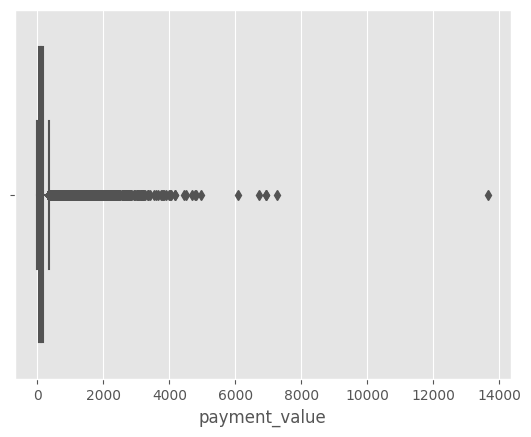

In [58]:
# Memeriksa outlier pada kolom payment value dari dataframe payments_df
sns.boxplot(data=payments_df,x='payment_value')

# Menampilkan boxplot
plt.show()

Terdapat outliers pada data *payment_value*. Treatment yang dilakukan adalah `drop`, menghapus baris data yang memiliki outliers.

In [59]:
len(payments_df)
# 103886

103886

In [60]:
# Remove outliers
# Terdapat outlier pada data Weekly_Sales
Q1_sales = payments_df['payment_value'].quantile(0.25)
Q3_sales = payments_df['payment_value'].quantile(0.75)

IQR = Q3_sales - Q1_sales

batas_bawah = Q1_sales - 1.5 * IQR
batas_atas = Q3_sales + 1.5 * IQR

In [61]:
# Dataframe tanpa outliers
payments_df_new = payments_df[(payments_df['payment_value'] > batas_bawah) & (payments_df['payment_value'] < batas_atas)]
payments_df_new.head()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [62]:
len(payments_df_new)

95905

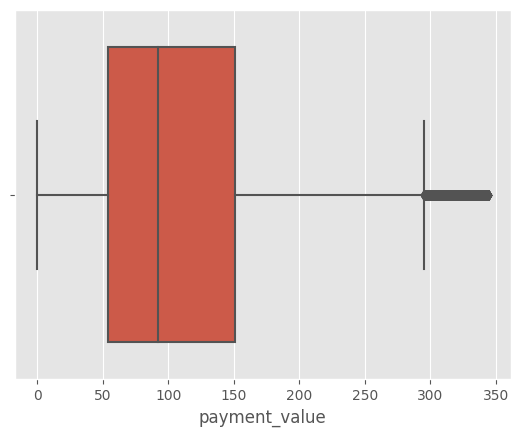

In [63]:
# Outliers sudah dikecualikan
sns.boxplot(data=payments_df_new,x='payment_value')

# Menampilkan boxplot
plt.show()

### Memeriksa inkonsistensi format data

In [64]:
# Menggabungkan data dari tabel olist_Products dan olist_product_category_name_translation
m_df = pd.merge(product_df, prodcat_df, on='product_category_name')

# Membuat dataframe product_df yang berisi semua kolom Olist_Products, kecuali kolom product_category_name diganti dengan kolom product_category_name_english
pr_df = m_df.drop(columns=['product_category_name']).rename(columns={'product_category_name_english': 'product_category_name'})

# Menampilkan hasil
pr_df

,index_x,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index_y,product_category_name
0,0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,6,perfumery
1,16,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,6,perfumery
2,77,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,6,perfumery
3,84,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,6,perfumery
4,120,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,6,perfumery
...,...,...,...,...,...,...,...,...,...,...,...
32322,21352,13b25797ad1e6d6c7cd3cbeb35f8ee7a,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,38,furniture_mattress_and_upholstery
32323,26296,dc36a7859b743d8610a2bbbaea26ece9,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,38,furniture_mattress_and_upholstery
32324,29085,107fde0930956120d1e13dd1062fbb46,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,38,furniture_mattress_and_upholstery
32325,29267,726b4e18f00255e2e63491bcba3f60b8,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,38,furniture_mattress_and_upholstery


In [65]:
pr_df['product_category_name'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'home_app

In [66]:
count_df = pr_df['product_category_name'].value_counts().reset_index()

# Mengubah nama kolom pada dataframe hasil penghitungan
count_df = count_df.rename(columns={'index': 'unique_values', 'product_category_name': 'count'})

# Menampilkan dataframe hasil penghitungan
print(count_df)

                unique_values  count
0              bed_bath_table   3029
1              sports_leisure   2867
2             furniture_decor   2657
3               health_beauty   2444
4                  housewares   2335
..                        ...    ...
66     tablets_printing_image      9
67  fashion_childrens_clothes      5
68             home_comfort_2      5
69      security_and_services      2
70          cds_dvds_musicals      1

[71 rows x 2 columns]


In [67]:
# Inkonsistensi format data
mapping = {
    "home_appliances_2": "home_appliances",
    "home_comfort_2": "home_comfort",
    "home_confort": "home_comfort"
}

# Mengganti data inkonsisten
pr_df["product_category_name"] = pr_df["product_category_name"].replace(mapping)
pr_df = pr_df.drop(columns=['index_x', 'index_y'])

# recheck the result
pr_df['product_category_name'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical', 'party_supplies'

In [68]:
count_df = pr_df['product_category_name'].value_counts().reset_index()

# Mengubah nama kolom pada dataframe hasil penghitungan
count_df = count_df.rename(columns={'index': 'unique_values', 'product_category_name': 'count'})

# Menampilkan dataframe hasil penghitungan
print(count_df)

                        unique_values  count
0                      bed_bath_table   3029
1                      sports_leisure   2867
2                     furniture_decor   2657
3                       health_beauty   2444
4                          housewares   2335
..                                ...    ...
64  furniture_mattress_and_upholstery     10
65             tablets_printing_image      9
66          fashion_childrens_clothes      5
67              security_and_services      2
68                  cds_dvds_musicals      1

[69 rows x 2 columns]


In [69]:
product_df = pr_df



---

---





## Analisis Data

### Payment Method

In [70]:
# Join dataframe payments dan order
merged = pd.merge(payments_df_new, order_df, on='order_id')
merged = merged.drop(columns=['index_x', 'index_y'])

# Agregasi data
grouped = merged.groupby('payment_type').size().reset_index(name='payment_count')

# Sort data
sorted_df = grouped.sort_values(by='payment_count', ascending=False)

print(sorted_df)

  payment_type  payment_count
1  credit_card          68325
0       boleto          17953
3      voucher           5422
2   debit_card           1406


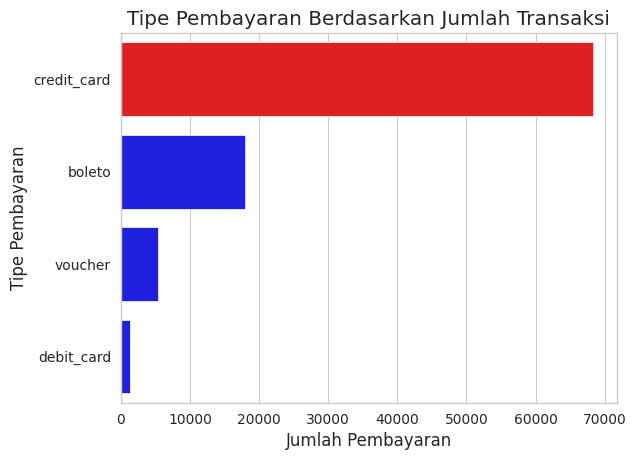

In [71]:
sns.set_style('whitegrid')

# Membuat horizontal bar chart
sns.barplot(x='payment_count', y='payment_type', data=sorted_df, palette=['red' if x == 'credit_card' else 'blue' for x in sorted_df['payment_type']])

# Menambahkan judul dan label pada chart
plt.title('Tipe Pembayaran Berdasarkan Jumlah Transaksi')
plt.xlabel('Jumlah Pembayaran')
plt.ylabel('Tipe Pembayaran')
plt.show()

In [72]:
# Membuat pivot table untuk menghitung payment_count, total (sum), rata-rata(mean), setiap metode pembayaran
pivot_table = pd.pivot_table(merged, index='payment_type', values='payment_value', aggfunc=['count', 'sum','min','max', 'mean', 'median', 'std'])
pivot_table = pivot_table.sort_values(by=('sum', 'payment_value'), ascending=False)

# Menampilkan hasil
pivot_table

,count,sum,min,max,mean,median,std
,payment_value,payment_value,payment_value,payment_value,payment_value,payment_value,payment_value
payment_type,,,,,,,
credit_card,68325,7878430.02,0.01,344.34,115.308160,98.140,72.993892
boleto,17953,1917751.94,11.62,344.33,106.820695,87.380,69.146709
voucher,5422,299794.04,0.00,341.02,55.292150,38.005,55.585071
debit_card,1406,146791.40,13.38,340.07,104.403556,84.470,69.860794


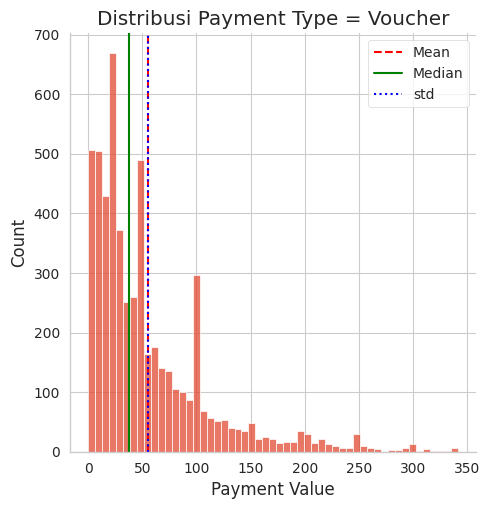

*Nilai mean adalah 55.292150497971235
**Nilai median adalah 38.004999999999995
***Nilai std adalah 55.57994482202419


In [73]:
# Memeriksa distribusi payment_type == voucher
merged_voucher = merged[merged['payment_type'] == 'voucher']

sns.displot(merged_voucher['payment_value'])

mean = np.mean(merged_voucher['payment_value'])
median = np.median(merged_voucher['payment_value'])
std = np.std(merged_voucher['payment_value'])

plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='solid', label='Median')
plt.axvline(std, color='b', linestyle='dotted', label='std')
plt.title('Distribusi Payment Type = Voucher')
plt.xlabel('Payment Value')
plt.ylabel('Count')
plt.legend()

plt.show()

print(f'*Nilai mean adalah {mean}')
print(f'**Nilai median adalah {median}')
print(f'***Nilai std adalah {std}')

### Sales Trend. Trend jumlah pembayaran Customer Olist per bulan

In [74]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93106 entries, 0 to 93105
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       93106 non-null  object        
 1   payment_sequential             93106 non-null  int64         
 2   payment_type                   93106 non-null  object        
 3   payment_installments           93106 non-null  int64         
 4   payment_value                  93106 non-null  float64       
 5   customer_id                    93106 non-null  object        
 6   order_status                   93106 non-null  object        
 7   order_purchase_timestamp       93106 non-null  datetime64[ns]
 8   order_approved_at              93106 non-null  datetime64[ns]
 9   order_delivered_carrier_date   93106 non-null  datetime64[ns]
 10  order_delivered_customer_date  93106 non-null  datetime64[ns]
 11  order_estimated

In [75]:
merged['month_purchase'] = merged.order_purchase_timestamp.dt.month
merged['year_purchase'] = merged.order_purchase_timestamp.dt.year
merged

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_purchase,year_purchase
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,4,2018
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,6,2018
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,12,2017
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,12,2017
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93101,0872d0faafe0cb56e6f2c594cca1522c,1,credit_card,2,127.92,dd2f0d64271438f6ad3a75d2a930a4b5,delivered,2017-09-26 12:10:26,2017-09-26 12:28:17,2017-10-02 15:18:57,2017-10-06 21:34:13,2017-10-26,9,2017
93102,3531718b24dfd5022fb0d101e10e33b9,1,credit_card,1,194.11,5b819ae762ee1d0424f92fd742a8ed7b,delivered,2018-03-06 20:19:31,2018-03-06 20:30:39,2018-03-08 18:17:02,2018-03-28 20:47:51,2018-04-11,3,2018
93103,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,0fea3afc6a1510c9db75d349d28af974,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,2018-05-17 12:41:00,2018-05-22 17:28:28,2018-06-12,5,2018
93104,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,8,2017


In [76]:
# Memeriksa nilai min dan max dari order_purchase_timestamp
min(merged.order_purchase_timestamp), max(merged.order_purchase_timestamp)

(Timestamp('2016-10-03 09:44:50'), Timestamp('2018-08-29 15:00:37'))

In [77]:
#Mencari trend bulanan dari nilai pembayaran
monthly = pd.DataFrame(merged.groupby(['month_purchase','year_purchase'])['payment_value'].sum())
monthly

payment_value
month_purchase year_purchase               
1              2017                73173.95
               2018               752468.64
2              2017               169636.60
               2018               691024.27
3              2017               265658.21
               2018               753698.34
4              2017               242501.39
               2018               736225.04
5              2017               369677.48
               2018               723581.15
6              2017               322411.47
               2018               657449.44
7              2017               410260.96
               2018               657469.09
8              2017               436260.90
               2018               666531.28
9              2017               440495.44
10             2016                28409.30
               2017               476823.01
11             2017               770344.95
12             2016                   19.62
               2017               598646.87

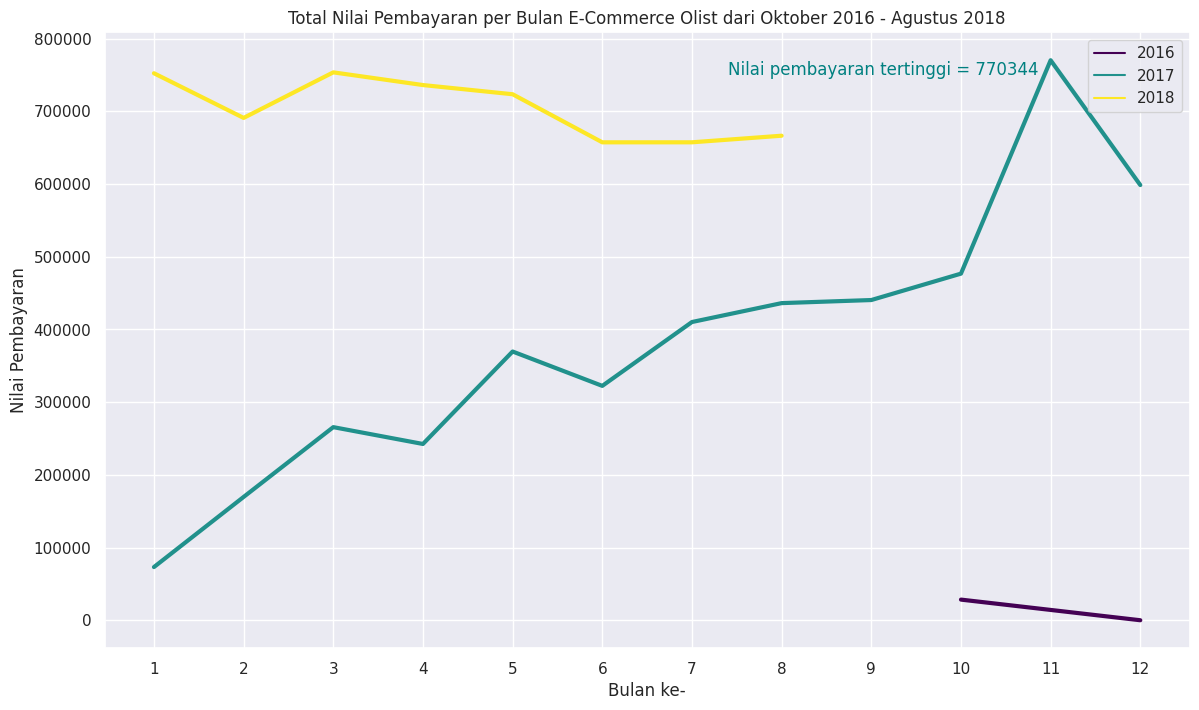

** Tidak ada record data nilai penjualan customer Olist pada bulan November 2016
*** Secara umum, nilai pembayaran customer Olist terus mengalami peningkatan dari tahun ke tahun (trend positif)
**** Nilai pembayaran customer Olist tahun 2018 stagnan, cenderung mengalami penurunan.


In [78]:
sns.set_style('darkgrid') # style
sns.set(rc={'figure.figsize':(14,8)}) #mengatur ukuran gambar

ax = sns.lineplot(data=monthly, x ='month_purchase', y = 'payment_value',
                  hue='year_purchase', palette='viridis',
                  legend='full', lw=3) #membuat lineplot

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) #mengatur sumbu x bertambah 1
ax.text(7.4, 750000, 'Nilai pembayaran tertinggi = 770344', fontsize=12, color='teal')

plt.title('Total Nilai Pembayaran per Bulan E-Commerce Olist dari Oktober 2016 - Agustus 2018')
plt.legend(bbox_to_anchor=(1, 1)) #membuat legend
plt.ylabel('Nilai Pembayaran')
plt.xlabel('Bulan ke-')
plt.show()
print("** Tidak ada record data nilai penjualan customer Olist pada bulan November 2016")
print("*** Secara umum, nilai pembayaran customer Olist terus mengalami peningkatan dari tahun ke tahun (trend positif)")
print("**** Nilai pembayaran customer Olist tahun 2018 stagnan, cenderung mengalami penurunan.")

### Customer Demographic

In [79]:
# Menggabungkan data dari tabel olist_customers dan olist_orders
merged_df = pd.merge(customer_df, order_df, on='customer_id')
merged_df = merged_df.drop(columns=['index_x', 'index_y'])

# Menghitung jumlah order untuk setiap customer state dan order status
result_df = merged_df.groupby(['customer_state', 'order_status']).size().reset_index(name='order_count')
result_df = result_df.sort_values(by='order_count', ascending=False)

# Menampilkan hasil
result_df

,customer_state,order_status,order_count
29,SP,delivered,40488
20,RJ,delivered,12348
11,MG,delivered,11351
24,RS,delivered,5342
18,PR,delivered,4923
26,SC,delivered,3546
4,BA,delivered,3256
6,DF,delivered,2080
7,ES,delivered,1995
8,GO,delivered,1957


In [80]:
# merged_df
merged_df['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

In [81]:
delivered_orders_df = result_df[result_df['order_status'] == 'delivered']
canceled_orders_df = result_df[result_df['order_status'] == 'canceled']

Text(0, 0.5, 'Customer State')

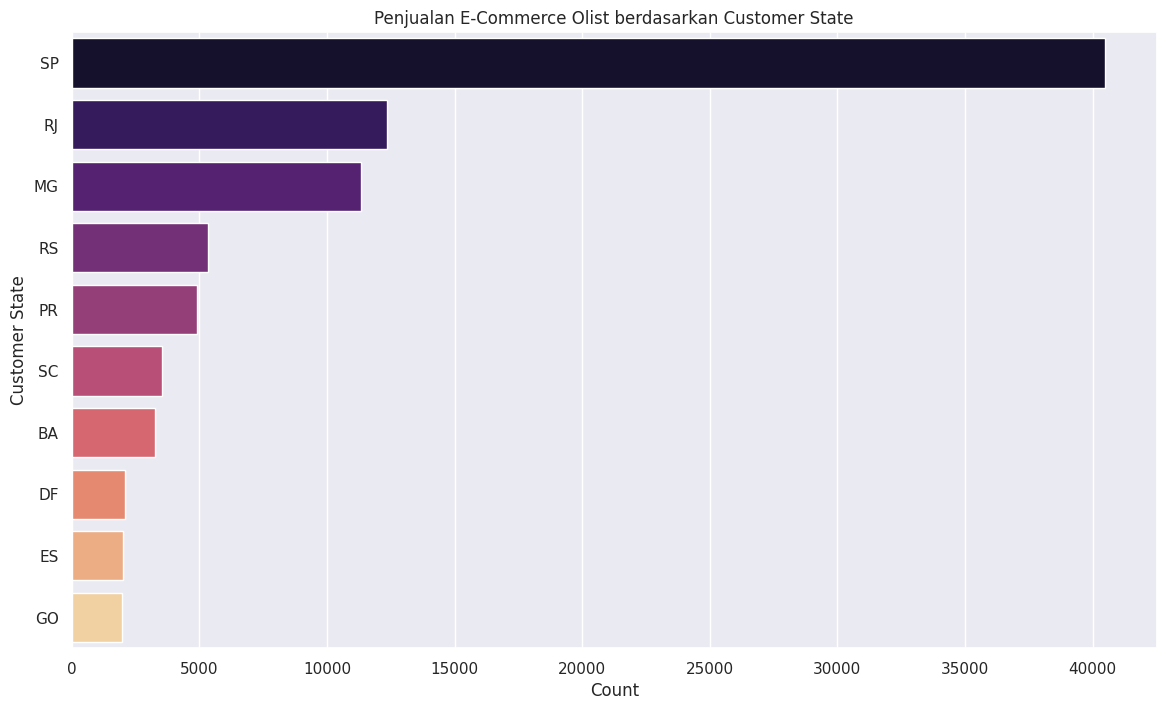

In [82]:
top = delivered_orders_df.head(10)
sns.barplot(data=top, x="order_count", y="customer_state", palette="magma")
plt.title("Penjualan E-Commerce Olist berdasarkan Customer State")
plt.xlabel("Count")
plt.ylabel("Customer State")

In [83]:
delivered_orders_df

,customer_state,order_status,order_count
29,SP,delivered,40488
20,RJ,delivered,12348
11,MG,delivered,11351
24,RS,delivered,5342
18,PR,delivered,4923
26,SC,delivered,3546
4,BA,delivered,3256
6,DF,delivered,2080
7,ES,delivered,1995
8,GO,delivered,1957


In [84]:
canceled_orders_df

,customer_state,order_status,order_count
19,RJ,canceled,3
25,SC,canceled,1
10,MG,canceled,1
28,SP,canceled,1


In [85]:
# Filter order status canceled
delivered_orders_df = merged[merged['order_status'] == 'canceled']

In [86]:
#Mencari trend bulanan
monthly_delivered = pd.DataFrame(delivered_orders_df.groupby(['month_purchase','year_purchase'])['order_status'].count())
# monthly_delivered = monthly_delivered[monthly_delivered['order_status'] == 'delivered']
monthly_delivered

,,order_status
month_purchase,year_purchase,
2,2018,1
10,2016,5


In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 96460
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96461 non-null  object        
 1   customer_unique_id             96461 non-null  object        
 2   customer_zip_code_prefix       96461 non-null  int64         
 3   customer_city                  96461 non-null  object        
 4   customer_state                 96461 non-null  object        
 5   order_id                       96461 non-null  object        
 6   order_status                   96461 non-null  object        
 7   order_purchase_timestamp       96461 non-null  datetime64[ns]
 8   order_approved_at              96461 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 10  order_delivered_customer_date  96461 non-null  datetime64[ns]
 11  order_estimated

In [88]:
# Menghitung lead time, selisih waktu antara order purchase dengan order delivered
merged_df['lead_time'] = merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']

# Menghitung selisih dalam satuan jam
merged_df['lead_time'] = merged_df['lead_time'] / np.timedelta64(1, 'h')

# Menampilkan hasil
print(merged_df['lead_time'].agg(['sum', 'mean', 'max', 'min']))
# merged_df.info()

sum     2.907299e+07
mean    3.013963e+02
max     5.031087e+03
min     1.280194e+01
Name: lead_time, dtype: float64


In [89]:
# Menghitung lead time, selisih waktu antara order purchase dengan order delivered
merged_df['lead_time'] = merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']

# Menghitung selisih dalam satuan jam
merged_df['lead_time'] = merged_df['lead_time'] / np.timedelta64(1, 'h')

# Aggregasi lead time berdasarkan customer state
lead_time_agg = merged_df.groupby('customer_state')['lead_time'].agg(['mean', 'std', 'max', 'min']).T
lead_time_agg

customer_state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
mean,504.857111,589.052529,634.223782,652.441625,464.051180,510.447753,311.221635,378.943371,374.552125,518.036734,...,287.797973,367.453214,462.675749,464.928876,705.301104,367.228564,359.023139,516.474919,210.239277,423.793503
std,259.864990,275.599948,332.682205,513.114958,280.653667,315.125694,169.322745,255.376422,222.804040,272.593216,...,167.590632,276.555195,311.805286,184.666010,665.818114,220.297375,205.950649,402.251743,161.997296,181.943470
max,1732.759444,2183.063889,3333.066944,4492.882778,4030.650000,4036.365833,1646.907500,5031.086667,4345.452500,4033.987222,...,2339.244167,5000.442222,4177.153889,1218.718611,4131.348611,4469.682500,2356.271944,4671.206667,4595.125000,1392.253056
min,172.320000,100.600000,98.841667,122.573056,20.722222,68.406111,30.400278,51.883056,30.242778,73.846111,...,26.108889,12.801944,34.123889,189.029722,161.831944,25.769722,37.005556,147.321389,18.752778,129.429167


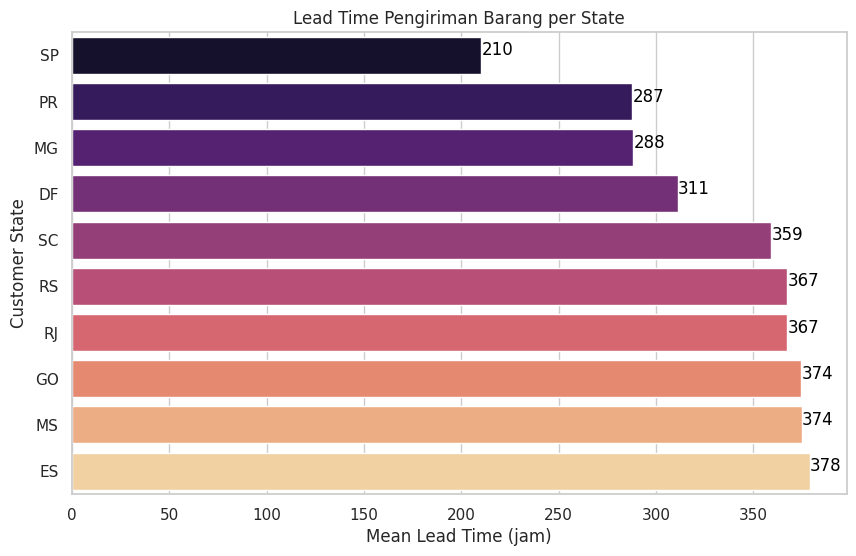

In [91]:
# Visualisasi top-10 data hasil aggregasi lead time
lead_time_agg = merged_df.groupby('customer_state')['lead_time'].agg(['mean', 'max', 'min'])
top = lead_time_agg.sort_values(by='mean', ascending=True).head(10)

# Membuat horizontal bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=top, x="mean", y=top.index, palette="magma")
plt.title("Lead Time Pengiriman Barang per State")
plt.xlabel("Mean Lead Time (jam)")
plt.ylabel("Customer State")

for i, v in enumerate(top['mean']):
    plt.text(v + 0.1, i, str(int(v)), color='black', fontsize=12)

plt.show()

Repeat order customer Olist dari state SP

In [92]:
# 1. Jumlah order dari customer_state = SP dengan order_status = delivered
count_sp_delivered = len(merged_df[(merged_df['customer_state'] == 'SP') & (merged_df['order_status'] == 'delivered')])

# 2. Jumlah unik customer dari customer_state = SP dengan order_status = delivered
unique_sp_delivered = len(merged_df[(merged_df['customer_state'] == 'SP') & (merged_df['order_status'] == 'delivered')]['customer_unique_id'].unique())

# 3. Tiga customer dengan order terbanyak dimana customer_state = SP dengan order_status = delivered
top_3_sp_delivered = merged_df[(merged_df['customer_state'] == 'SP') & (merged_df['order_status'] == 'delivered')].groupby('customer_unique_id')['order_id'].nunique().sort_values(ascending=False).head(3)

# 4. Jumlah customer yang melakukan repeat order
repeat_customers = merged_df.groupby('customer_unique_id')['order_id'].count().reset_index(name='order_count')
repeat_customers = repeat_customers[repeat_customers['order_count'] > 1]
count_repeat_customers = repeat_customers.shape[0]

# Menampilkan hasil
print("Jumlah order dari customer_state = SP dengan order_status = delivered:", count_sp_delivered)
print("---" * 30)
print("---" * 30)
print("Jumlah unik customer dari customer_state = SP dengan order_status = delivered:", unique_sp_delivered)
print("---" * 30)
print("---" * 30)
print("Tiga customer dengan order terbanyak dimana customer_state = SP dengan order_status = delivered:\n", top_3_sp_delivered)
print("---" * 30)
print("---" * 30)
print("Jumlah customer yang melakukan repeat order dari customer_state = SP adalah", count_repeat_customers)

Jumlah order dari customer_state = SP dengan order_status = delivered: 40488
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Jumlah unik customer dari customer_state = SP dengan order_status = delivered: 39144
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Tiga customer dengan order terbanyak dimana customer_state = SP dengan order_status = delivered:
 customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    15
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
Name: order_id, dtype: int64
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Jumlah customer yang melakuka

### RFM Analysis

In [93]:
# Menggabungkan data order_df dan payment_df berdasarkan order_id
rfm_df = pd.merge(order_df, payments_df_new, on='order_id')

# Menghitung recency, frequency, dan monetary value
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])
rfm_df['recency'] = (datetime.now() - rfm_df.groupby('customer_id')['order_purchase_timestamp'].transform('min')).dt.days
rfm_df['frequency'] = rfm_df.groupby('customer_id')['order_id'].transform('nunique')
rfm_df['monetary_value'] = rfm_df.groupby('customer_id')['payment_value'].transform('mean')

# Menghitung RFM score
rfm_df['rfm_score'] = rfm_df['recency'].astype(str) + rfm_df['frequency'].astype(str) + rfm_df['monetary_value'].astype(str)

# Menampilkan customer_id dan rfm_score
result = rfm_df[['customer_id', 'rfm_score']].drop_duplicates()

# Menampilkan hasil
print(result)

                            customer_id                rfm_score
0      9ef432eb6251297304e76186b10a928d  2095112.903333333333334
3      b0830fb4747a6c6d20dea0b8c802d7ef              17991141.46
4      41ce2a54c0b03bf3443c3d931a367089              17851179.12
5      f88197465ea7920adcdbec7375364d82                2047172.2
6      8ab97904e6daea8866dbdbc4fb7aad2c               1960128.62
...                                 ...                      ...
93101  47cd45a6ac7b9fb16537df2ccffeb5ac              23161155.99
93102  39bd1228ee8140590ac3aca26f2dfe00               2302185.08
93103  1fca14ff2861355f6e5f14306ff977a7               19681195.0
93104  1aa71eb042121263aafbe80c1b562c9c              21311271.01
93105  edb027a75a1449115f6b43211ae02a24               1937186.86

[88961 rows x 2 columns]




---



---



---

